# Introducción a Problemas de Clasificación


# Análisis Exploratorio de Datos

El análisis exploratorio de datos (EDA), es transversal siempre. Así que... esta primera parte es exactamente igual al notebook de introducción a EDA.


Ejemplo basado en *la historia de la vida* 😊


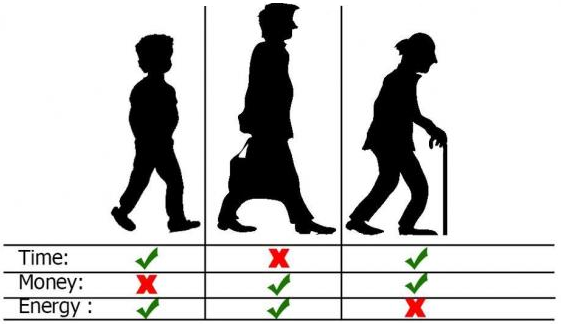


## Preprocesamiento de datos

Importación de módulos y librerías útiles

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Archivos pueden arrastrarse al área de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_IA/raw/main/1_RNA_Classification/data_classification.zip

--2023-08-25 21:26:01--  https://github.com/AxelSkrauba/Taller_IA/raw/main/1_RNA_Classification/data_classification.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/1_RNA_Classification/data_classification.zip [following]
--2023-08-25 21:26:02--  https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/1_RNA_Classification/data_classification.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004 (2.0K) [application/zip]
Saving to: ‘data_classification.zip’

data_classification 100%[===================>]   1.96K  --.-KB/s    in 0s      

2023-08-25 21:26:02 

In [ ]:
!unzip data_classification.zip

Archive:  data_classification.zip
  inflating: data_test.csv           
  inflating: data.csv                


In [ ]:
# Lectura del dataset
dataset = pd.read_csv("data.csv")

In [ ]:
# Para visualizar un fragmento de los datos
dataset.head(5)

,tiempo,dinero,energia,clase
0,0.94,0.44,0.17,Anciano
1,0.81,0.02,0.84,Joven
2,0.89,0.06,0.94,Joven
3,0.84,0.09,0.31,Adulto
4,0.95,0.76,0.19,Anciano


In [ ]:
# Para visualizar tipos de datos, cantidades, etc.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tiempo   200 non-null    float64
 1   dinero   200 non-null    float64
 2   energia  200 non-null    float64
 3   clase    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
dataset.describe()
# Genera los descriptores estadísticos básicos

,tiempo,dinero,energia
count,200.000000,200.000000,200.000000
mean,0.854100,0.343750,0.500650
std,0.136121,0.304445,0.320212
min,0.500000,0.000000,0.000000
25%,0.800000,0.060000,0.210000
50%,0.910000,0.280000,0.465000
75%,0.950000,0.570000,0.812500
max,1.000000,0.970000,1.000000


In [ ]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        print(col,"->", dataset[col].unique())

clase -> ['Anciano' 'Joven' 'Adulto']


<Axes: ylabel='clase'>

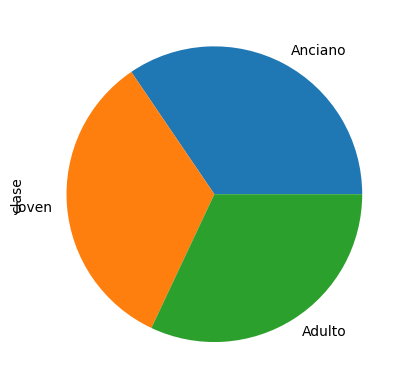

In [ ]:
# Ejemplo de gráfica para una idea de las distribuciones
# En este caso... todo está medianamente equilibrado
# En la vida real es diferente
dataset['clase'].value_counts().plot.pie()

<ipython-input-10-6533168483e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


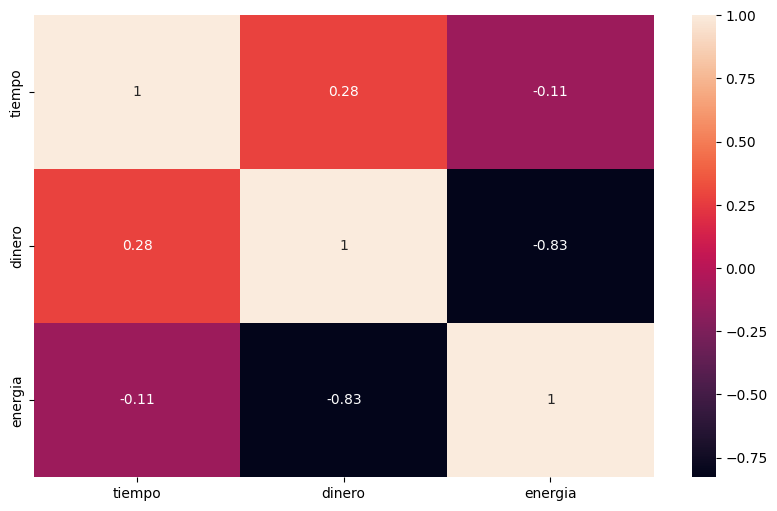

In [ ]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
# Antes de plantear cualquier modelo, existe un gran trabajo de procesamiento y análisis de los datos. Herramientas Estadísticas juegan un roll fundamental.
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# En este caso, por ejemplo, no se observan fuertes relaciones entre las variables. Por lo tanto, en principio existe información útil en todas.
# NOTA: variables aletorias tampoco estarán correlacionadas, pero en este punto, asumimos que anteriormente validamos que estas variables "tienen que ver" con nuestro problema.

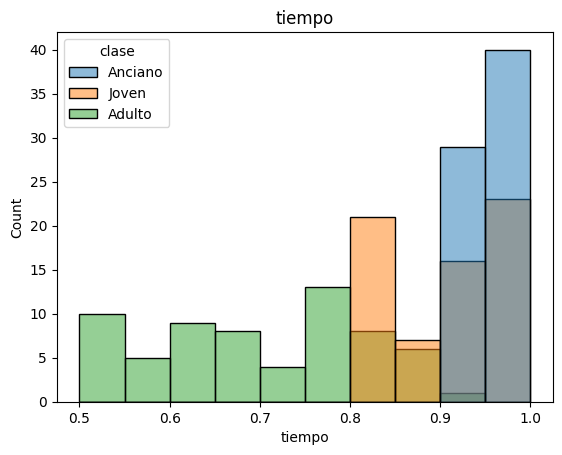

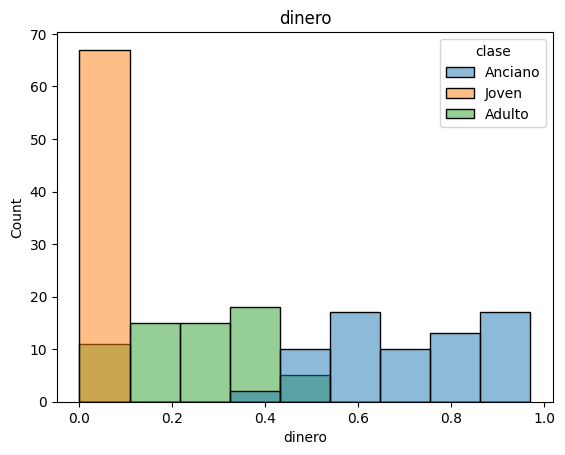

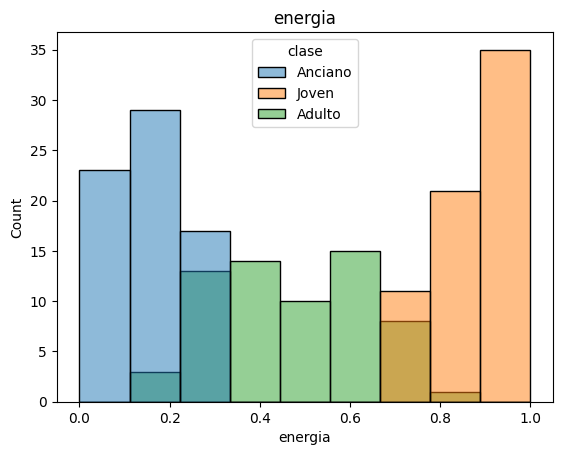

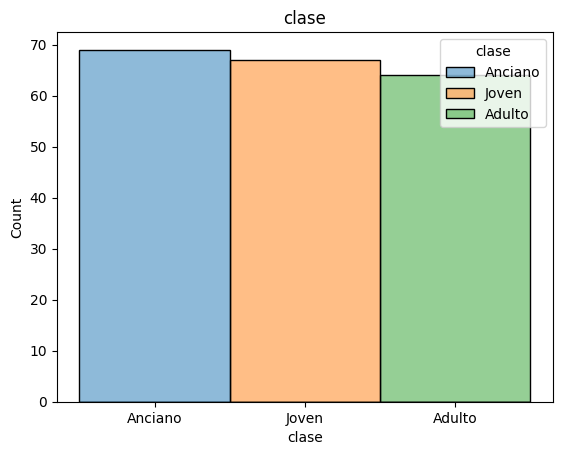

In [ ]:
# Más ejemplos de gráficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='clase')
    plt.show()

# Se aprecia por ejemplo, que existen superposiciones en los rangos de las variables. Por lo tanto, no sería tan sencillo clasificar las clases de salida
# y obtener una precisión buena con simples secuencias de selección (IF anidados por ejemplo, en dónde se establece un umbral estricto).

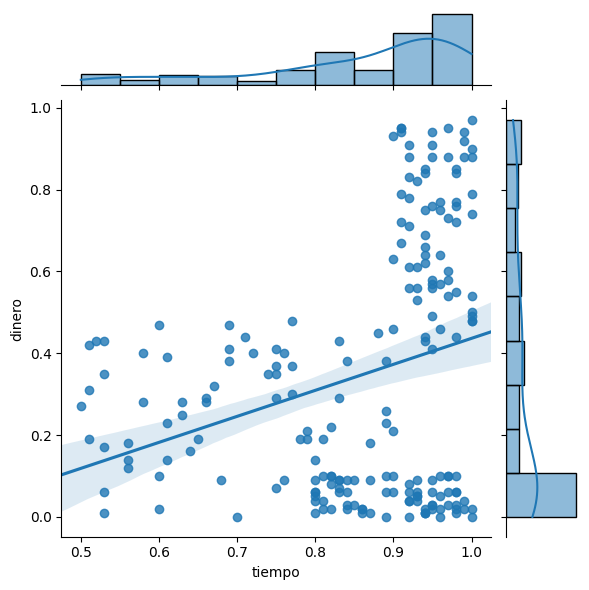

In [ ]:
# Para visualizar con mayor detalle la posible correlación entre dos variables numéricas.
g = sns.jointplot(x="tiempo", y="dinero", data=dataset,
                  kind="reg", truncate=False)

**Seaborn** es ideal para estudios estadísticos. Va un ejemplo más.

El uso de *PairGrid* puede brindar un resumen muy rápido y de muy alto nivel de las relaciones interesantes del conjunto de datos.

Una forma muy común de usar esta gráfica es coloreando las observaciones por una variable categórica separada.

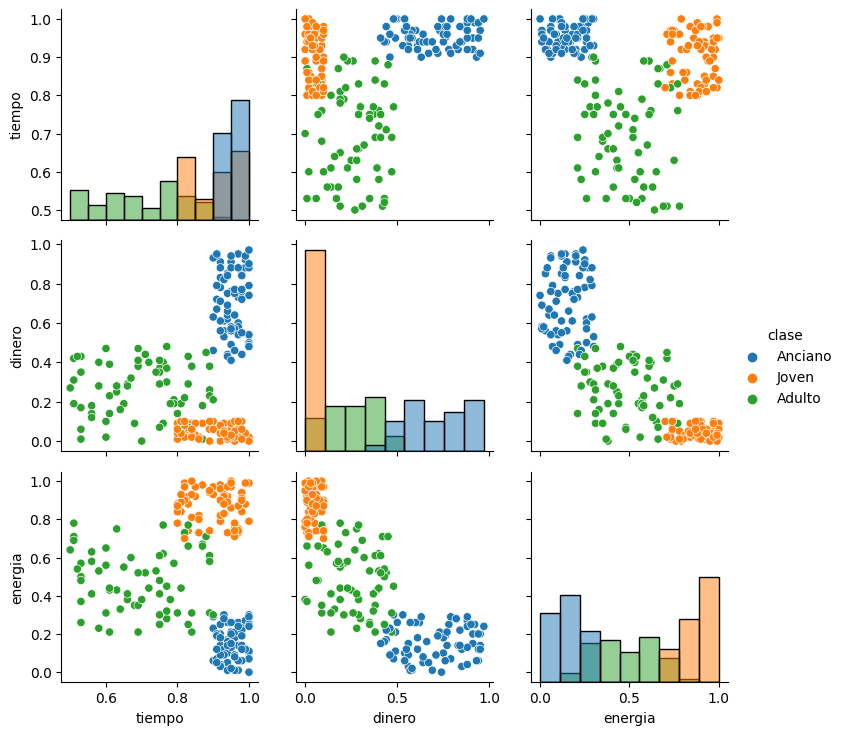

In [ ]:
g = sns.PairGrid(dataset, hue="clase")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset.pop('clase')
print("Y antes:\n", y[:5])

# Preprocesamiento
# Se codifica numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “Joven” y “Adulto” en la clase, queda 0 y 1.
le = LabelEncoder()

y = le.fit_transform(y)     # Con le.inverse_transform() recuperamos luego la etiqueta original
print("Y despues: ", y[:5])

Y antes:
 0    Anciano
1      Joven
2      Joven
3     Adulto
4    Anciano
Name: clase, dtype: object
Y despues:  [1 2 2 0 1]


In [ ]:
y.shape

(200,)

In [ ]:
# Cantidad de datos a procesar.
print("Tamaño actual - Salida:", y.shape)

Tamaño actual - Salida: (200,)


In [ ]:
X = np.asarray(dataset) # Esto se puede hacer directamente porque para "y" se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", X.shape) # Es importante que el tamaño sea consistente entre X e Y (Entrada y Salida).

Tamaño actual - Entrada: (200, 3)


In [ ]:
# Ver datos de una determinada fila
index = 0
print("Tiempo: {} - Dinero: {} - Energía: {} || Clase: {}".format(X[index][0], X[index][1], X[index][2], le.inverse_transform(y)[index]))

Tiempo: 0.94 - Dinero: 0.44 - Energía: 0.17 || Clase: Anciano


In [ ]:
# División del dataset
# test_size: indica el porcentaje destinado a test/validacion
# random_state: un valor aleatorio cualquiera, sirve para garantizar repetibilidad. En este caso, en referencia a la subdivisión del set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
X.shape

(200, 3)

In [ ]:
X_train.shape

(180, 3)

In [ ]:
X_test.shape

(20, 3)

In [ ]:
X_train[0]

array([1.  , 0.5 , 0.26])

In [ ]:
y_train[0]

1

# Clasificación

**Comparación de Clasificadores**

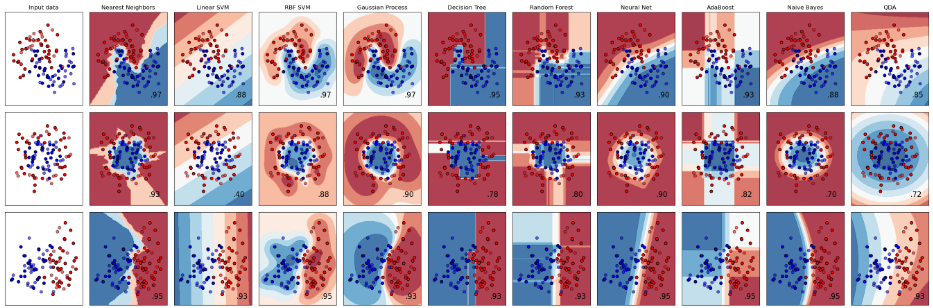

In [ ]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [ ]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

## Regresión Logística

In [ ]:
# Modelos para clasificación
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
modelo_lr.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

LogisticRegression()

In [ ]:
pred_lr = modelo_lr.predict(X_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo

Podemos comparar visualmente uno a uno los elementos, no suele ser lo que se hace. Cómo hay pocos... va una visualización rápida

In [ ]:
y_test

array([1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
pred_lr

array([1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### **Pequeña defición de lo que se ve en la tabla del reporte:**

**Precision** es la proporción de predicciones positivas que fueron correctas. Es decir, cuántos de los casos que tu modelo predijo como positivos, realmente eran positivos.

**Recall** es la proporción de casos reales positivos que fueron correctamente identificados. O sea, de todos los casos positivos reales, cuántos pudo identificar tu modelo.

**F1-score** es la media armónica de precision y recall. Resume la precisión y sensibilidad de un modelo en una sola métrica.

**Support** indica el número de muestras de cada clase que se usaron para calcular las métricas.

+ Precision: ¿Qué tan precisas son las predicciones positivas?
+ Recall: ¿Qué fracción de los reales positivos se detectó?
+ F1-score: Balance entre precisión y recall
+ Support: Número de muestras por clase.

A la hora de la verdad, lo ideal es que todo esté en `1`. `0` es lo peor.

La parte de abajo de la tabla, presenta métricas globales para todas las clases. Incluso ponderando la cantidad de muestras.

**Macro avg**: Es el promedio simple de las métricas calculadas por clase. Es decir, calcula la métrica (precision, recall, f1-score) por cada clase de forma independiente, y luego promedia esos valores. No tiene en cuenta el tamaño de clase.

**Weighted avg**: Es el promedio ponderado de las métricas calculadas por clase. Toma en cuenta la frecuencia o tamaño de cada clase para calcular el promedio. Le da más peso a las clases más grandes.

+ Macro avg: Promedio simple de métricas por clase. No considera tamaños.
+ Weighted avg: Promedio ponderado por clase. Considera tamaños de clase.

Usar macro avg nos da la métrica promedio sin importar la distribución. Weighted avg considera la prevalencia de clases y puede ser más representativo.

Según el problema, los tipos de datos y demás... conviene mirar una u otra métrica. Ciertos modelos, pueden funcionar mejor para resaltar alguna de ellas.

En nuestro ejemplo "sencillo", justo todo da perfecto.

In [ ]:
le.classes_     # Categorías guardadas en el label encoder

array(['Adulto', 'Anciano', 'Joven'], dtype=object)

In [ ]:
labels = le.inverse_transform((0, 1, 2))    # Podemos pedir la trasformación inversa, es decir, de las etiquetas numéricas a la categórica en string

In [ ]:
labels

array(['Adulto', 'Anciano', 'Joven'], dtype=object)

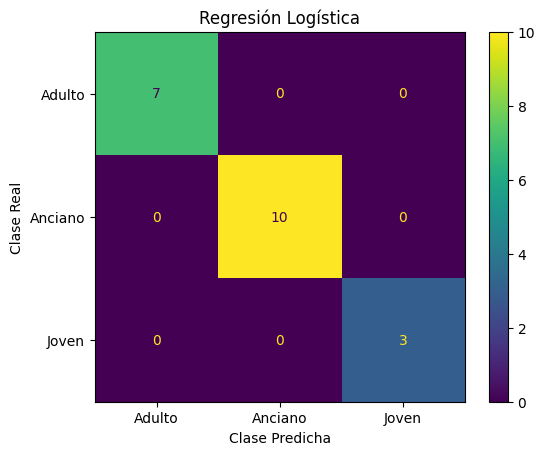

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística")

Perfecto el modelo, al parecer. No se equivoca en ninguna. Pueden haber muchos motivos para esto. Entre ellos: el modelo es buenísimo, se aprendió "de memoria" las relaciones en los datos que tenemos, etc.

En la matriz de confusión, están los datos que se usan para calcular las métricas que vimos en el reporte de clasificación.

### Prueba con los datos del otro CSV

In [ ]:
dataset_sepado = pd.read_csv("data_test.csv")

In [ ]:
y = dataset_sepado.pop('clase')
y = le.transform(y)     # Solo el método transform ahora, así aplico la misma transformación que arriba

X = np.asarray(dataset_sepado)

In [ ]:
X.shape

(100, 3)

In [ ]:
pred_lr_sepado = modelo_lr.predict(X)

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y, pred_lr_sepado))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       1.00      1.00      1.00        32
           2       0.91      1.00      0.95        39

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
labels

array(['Adulto', 'Anciano', 'Joven'], dtype=object)

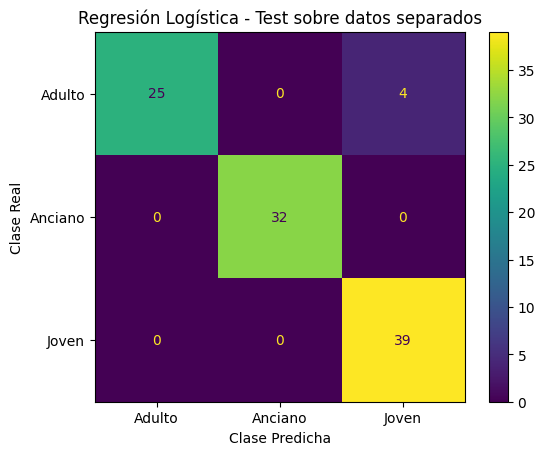

In [ ]:
plot_confusion_matrix(y, pred_lr_sepado, labels=labels, model_name="Regresión Logística - Test sobre datos separados")

Ahora, se confunde 4 adultos con jóvenes.

## Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



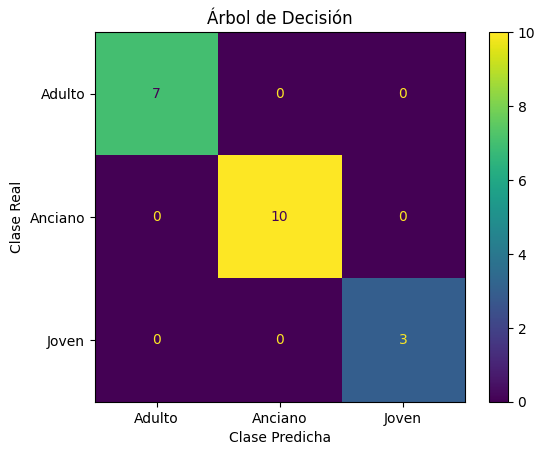

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión")

In [ ]:
pred_tree_sepado = tree_clf.predict(X)

In [ ]:
print("Reporte de Clasificación: \n", classification_report(y, pred_tree_sepado))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



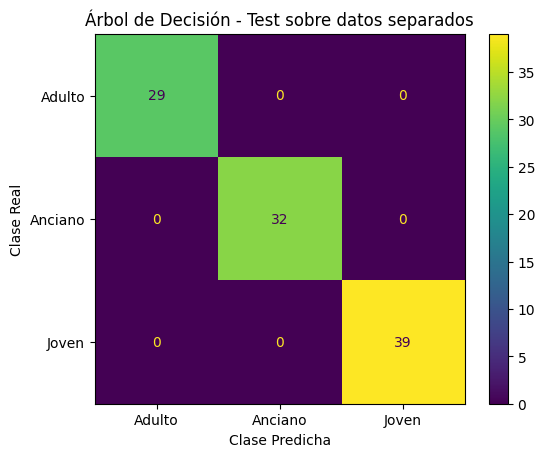

In [ ]:
plot_confusion_matrix(y, pred_tree_sepado, labels=labels, model_name="Árbol de Decisión - Test sobre datos separados")

Este modelo parece que sigue siendo igual de bueno con los datos nuevos.

In [ ]:
tree_clf.feature_importances_   # Este modelo permite saber la importancia que le dio a cada característica durante el ajuste de sus pesos.
                                # Está porcentual la salida. Y se corresponde con el orden de las características del arreglo de entrada.
                                # Es decir: [Tiempo, Dinero, Energía]

array([0.45163534, 0.10526967, 0.443095  ])

In [ ]:
dataset.columns

Index(['tiempo', 'dinero', 'energia'], dtype='object')

[Text(0.5, 0.875, 'x[2] <= 0.695\ngini = 0.666\nsamples = 180\nvalue = [57, 59, 64]'),
 Text(0.2, 0.625, 'x[0] <= 0.895\ngini = 0.497\nsamples = 109\nvalue = [50, 59, 0]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(0.3, 0.375, 'x[1] <= 0.31\ngini = 0.033\nsamples = 60\nvalue = [1, 59, 0]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 59\nvalue = [0, 59, 0]'),
 Text(0.8, 0.625, 'x[1] <= 0.145\ngini = 0.178\nsamples = 71\nvalue = [7, 0, 64]'),
 Text(0.7, 0.375, 'x[0] <= 0.78\ngini = 0.03\nsamples = 65\nvalue = [1, 0, 64]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 64\nvalue = [0, 0, 64]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]')]

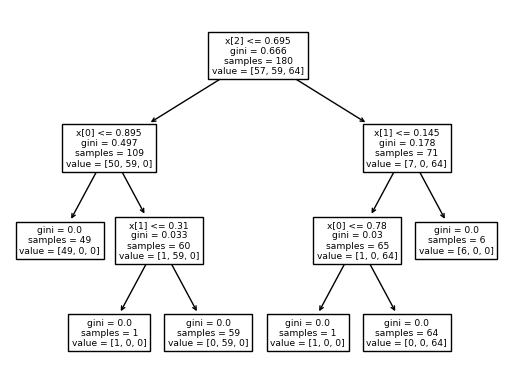

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)    # Este es un modelo que tiene una representación gráfica
                            # Podemos saber qué preguntas "se hace" el modelo y con cuál característica para identificar la clase de salida.

[Text(0.5, 0.875, 'Energía <= 0.695\ngini = 0.666\nsamples = 180\nvalue = [57, 59, 64]\nclass = Joven'),
 Text(0.2, 0.625, 'Tiempo <= 0.895\ngini = 0.497\nsamples = 109\nvalue = [50, 59, 0]\nclass = Anciano'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]\nclass = Adulto'),
 Text(0.3, 0.375, 'Dinero <= 0.31\ngini = 0.033\nsamples = 60\nvalue = [1, 59, 0]\nclass = Anciano'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Adulto'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 59\nvalue = [0, 59, 0]\nclass = Anciano'),
 Text(0.8, 0.625, 'Dinero <= 0.145\ngini = 0.178\nsamples = 71\nvalue = [7, 0, 64]\nclass = Joven'),
 Text(0.7, 0.375, 'Tiempo <= 0.78\ngini = 0.03\nsamples = 65\nvalue = [1, 0, 64]\nclass = Joven'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Adulto'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 64\nvalue = [0, 0, 64]\nclass = Joven'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]\nclass = Adulto

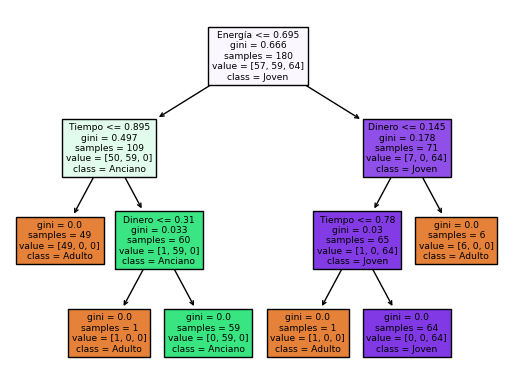

In [ ]:
tree.plot_tree(tree_clf,
              feature_names=["Tiempo", "Dinero", "Energía"],
              class_names=labels,
              filled=True)

Ahora... se pueden entender algunos memes

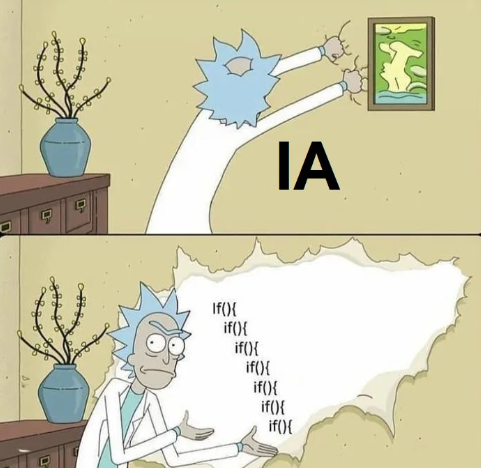

**¿Qué hizo el algoritmo?**

Determinar ***qué preguntas*** hacerle a los datos y ***cuántas***.


Estas técnicas se agrupan dentro de lo que se conoce como *Machine Learning* (aprendizaje de máquina). Que es un subconjunto de todo lo que abarca la Inteligencia Artificial.

## Más Modelos: misma filosofía para entrenamiento y evaluación

Agrupo algunas métricas de interés para evaluar y comparar múltiples modelos.

Al final, la idea es tener una tabla que resuma todo. Con esto, decidir qué modelo es el que presenta las prestaciones que me sirven.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

#######################################
Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
MCC: 100.00%
Tiempo de entrenamiento: 0.0151 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.0157 s
#######################################


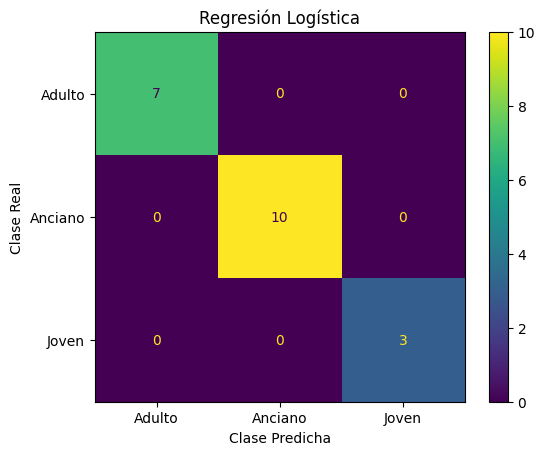

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística")

### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

#######################################
Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
MCC: 100.00%
Tiempo de entrenamiento: 0.0022 s
Tiempo de predicción: 0.0004 s
Tiempo total: 0.0027 s
#######################################


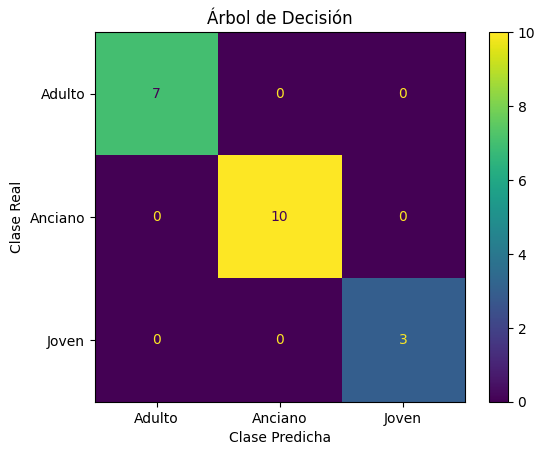

In [ ]:
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión")

### K Vecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

#######################################
Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
MCC: 100.00%
Tiempo de entrenamiento: 0.0019 s
Tiempo de predicción: 0.0022 s
Tiempo total: 0.0041 s
#######################################


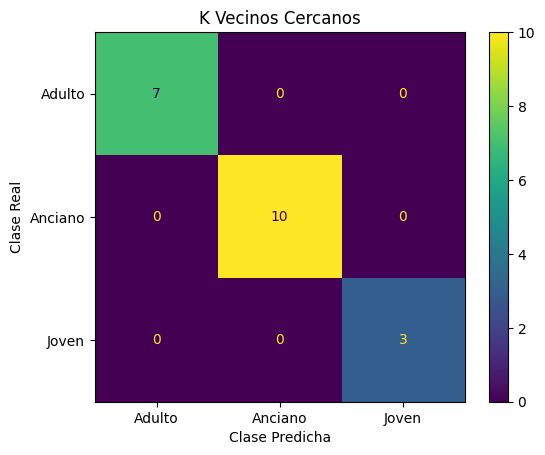

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=labels, model_name="K Vecinos Cercanos")

### Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.95        10
           2       0.60      1.00      0.75         3

    accuracy                           0.85        20
   macro avg       0.84      0.86      0.81        20
weighted avg       0.89      0.85      0.84        20

#######################################
Accuracy: 85.00%
Recall: 85.00%
Precision: 89.45%
F1-Score: 84.32%
MCC: 77.92%
Tiempo de entrenamiento: 0.1122 s
Tiempo de predicción: 0.0005 s
Tiempo total: 0.1127 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


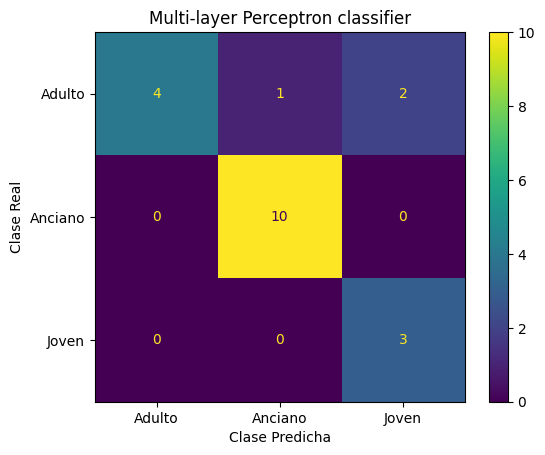

In [ ]:
plot_confusion_matrix(y_test, pred_nn, labels=labels, model_name="Multi-layer Perceptron classifier")

### Support Vector Machines (SVMs)

https://scikit-learn.org/stable/modules/svm.html#classification


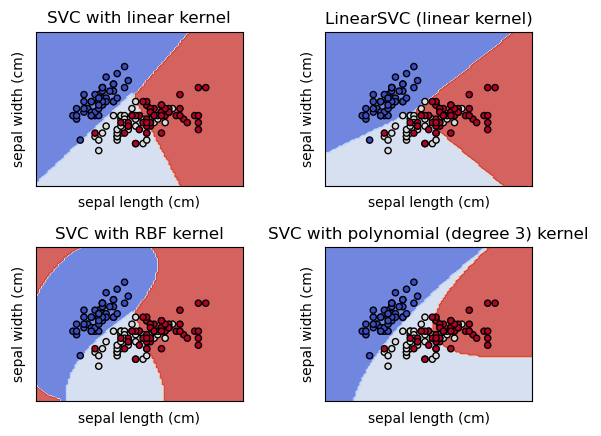

In [ ]:
from sklearn.svm import SVC

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

#######################################
Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
MCC: 100.00%
Tiempo de entrenamiento: 0.0028 s
Tiempo de predicción: 0.0007 s
Tiempo total: 0.0035 s
#######################################


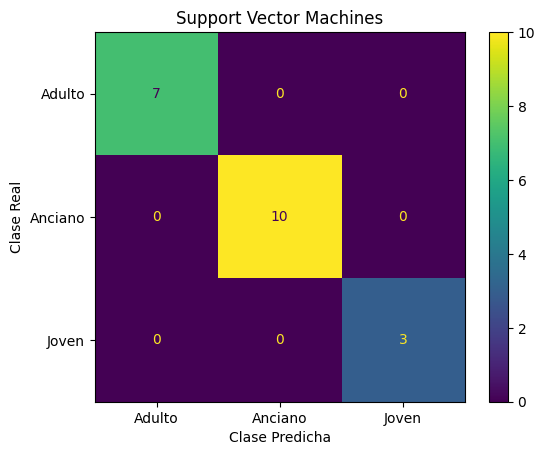

In [ ]:
plot_confusion_matrix(y_test, pred_svm, labels=labels, model_name="Support Vector Machines")

### Comparación de los Modelos

Para evaluar qué modelo se ajusta mejor a nuestros requerimientos.
Por ejemplo, si la velocidad de inferencia es crucial (tiempo en la consulta del modelo)... nos interesaría el menor tiempo a la hora de predecir.

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,100.00%,100.00%,100.00%,100.00%,100.00%,0.015,0.001,0.016
DecisionTreeClassifier,100.00%,100.00%,100.00%,100.00%,100.00%,0.002,0.000,0.003
KNeighborsClassifier,100.00%,100.00%,100.00%,100.00%,100.00%,0.002,0.002,0.004
Multi-layer Perceptron classifier,85.00%,85.00%,89.45%,84.32%,77.92%,0.112,0.000,0.113
SVM,100.00%,100.00%,100.00%,100.00%,100.00%,0.003,0.001,0.004


# Referencias y Recursos

*   https://numpy.org/doc/stable/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://matplotlib.org/stable/plot_types/index.html
*   https://scikit-learn.org/stable/supervised_learning.html
*   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html